In [21]:
# copied imports 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [22]:



train_data_path = 'data/sign_mnist_train.csv'
test_data_path = 'data/sign_mnist_test.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_data.head(), train_data.shape, test_data.shape

(   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      3     107     118     127     134     139     143     146     150   
 1      6     155     157     156     156     156     157     156     158   
 2      2     187     188     188     187     187     186     187     188   
 3      2     211     211     212     212     211     210     211     210   
 4     13     164     167     170     172     176     179     180     184   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     153  ...       207       207       207       207       206       206   
 1     158  ...        69       149       128        87        94       163   
 2     187  ...       202       201       200       199       198       199   
 3     210  ...       235       234       233       231       230       226   
 4     185  ...        92       105       105       108       133       163   
 
    pixel781  pixel782  pixel783  pixel784  
 0       206   

In [23]:

X_train = train_data.drop('label', axis=1).values
X_test = test_data.drop('label', axis=1).values

In [24]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
kmeans = KMeans(n_clusters=24, random_state=42)
kmeans.fit(X_train_scaled)
labels = kmeans.labels_

/Users/sakshamrai/Desktop/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
kmeans.predict(X_test_scaled)

array([18, 11, 21, ...,  7,  2,  7], dtype=int32)

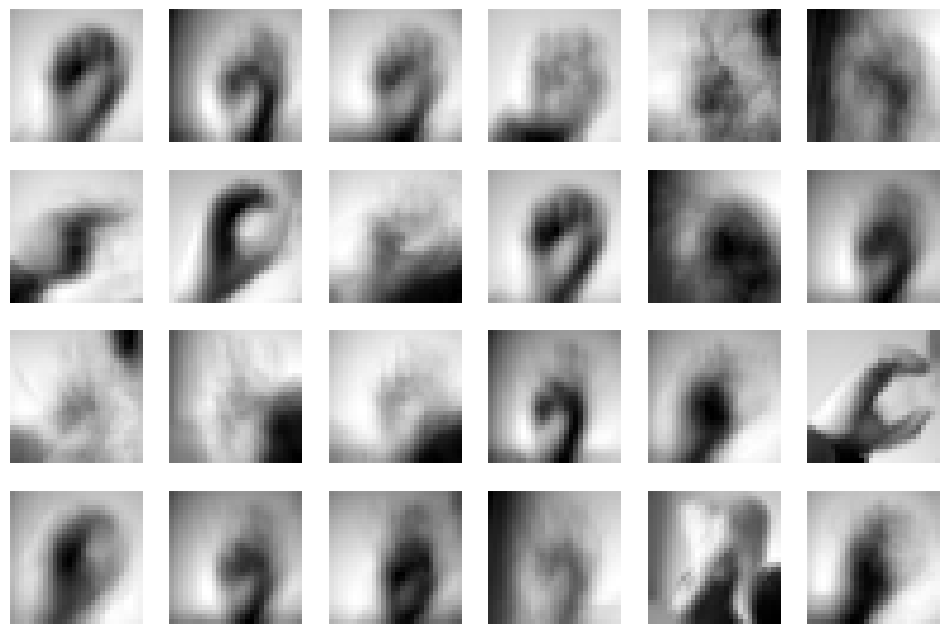

Adjusted Rand Index: 0.07079902391533496


In [27]:
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(12, 8))

for ax, center in zip(axs.flat, centers):
    # Reshape the center to a 2D array with one row
    center_2d = center.reshape(1, -1)
    image = scaler.inverse_transform(center_2d).reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.show()

from sklearn.metrics import adjusted_rand_score


labels_true = train_data['label'].values

# Calculate the Adjusted Rand Index
ari_score = adjusted_rand_score(labels_true, labels)

print(f"Adjusted Rand Index: {ari_score}")